In [5]:
%pip install joblib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

In [7]:
df = pd.read_csv("../data/spam.csv")

In [8]:

df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [9]:
# Remove the 'Email No.' column
df.drop(columns=['Email No.'], inplace=True)

In [10]:
# Check for missing values (optional)
print(df.isna().sum())

the           0
to            0
ect           0
and           0
for           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3001, dtype: int64


In [11]:
X = df.drop(columns=['Prediction'])  # features (word frequencies)
y = df['Prediction']                 # labels (spam or not)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [13]:
model = MultinomialNB()
model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [14]:
y_pred = model.predict(X_test)

In [15]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

 Accuracy: 0.9545893719806763

 Confusion Matrix:
 [[704  35]
 [ 12 284]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       739
           1       0.89      0.96      0.92       296

    accuracy                           0.95      1035
   macro avg       0.94      0.96      0.95      1035
weighted avg       0.96      0.95      0.96      1035



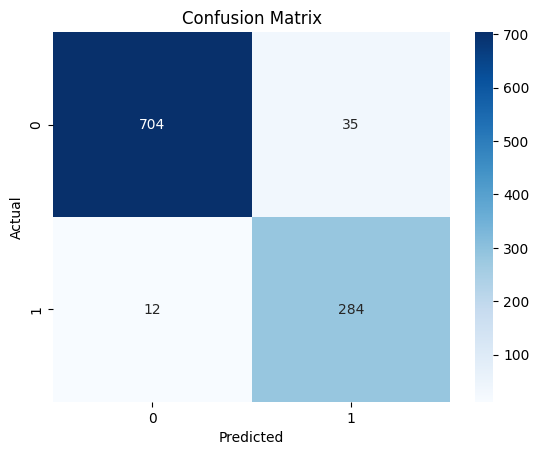

In [16]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [17]:
import os
import joblib  #  make sure this is here

# Go one level up to create or access 'models/' folder
os.makedirs("../models", exist_ok=True)

# Save the model inside models folder
joblib.dump(model, "../models/spam_naive_bayes_model.pkl")

print(" Model saved to 'models/spam_naive_bayes_model.pkl'")



 Model saved to 'models/spam_naive_bayes_model.pkl'
